In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size=100000
N=np.eye(10)+1
w,v = np.linalg.eigh(N)

In [9]:
#both the below methods are equivalent. 

In [3]:
sim = np.zeros((N.shape[0],size),dtype='float64')
for i in range(N.shape[0]):
    sim[i,:] = np.sqrt(w[i])*np.random.randn(sim.shape[1])

In [3]:
sim = np.zeros((N.shape[0],size),dtype='float64')
for i in range(size):
    sim[:,i] = np.sqrt(w)*np.random.randn(sim.shape[0])

In [4]:
n_new = v@sim

In [5]:
n_new.shape

(10, 100000)

In [6]:
N_new = np.zeros(N.shape,dtype=N.dtype)
print(N_new.shape)

(10, 10)


In [7]:
for i in range(sim.shape[1]):
    r = n_new[:,i:i+1].copy()
    N_new[:] = N_new + r@r.T
N_new[:] = N_new/sim.shape[1]

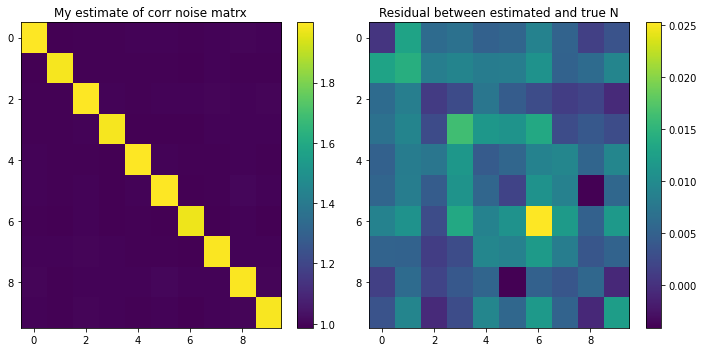

In [8]:
f=plt.gcf()
f.set_size_inches(10,5)
plt.subplot(121)
plt.title("My estimate of corr noise matrx")
plt.imshow(N_new,aspect='auto',interpolation='none')
plt.colorbar()

plt.subplot(122)
plt.title("Residual between estimated and true N")
plt.imshow(N-N_new,aspect='auto',interpolation='none')
plt.colorbar()
plt.tight_layout()